# Analysis - exp41

- Tune attempt 1 for MCTS.

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "run_{}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

In [5]:
path = "/Users/qualia/Code/azad/data/wythoff/exp41/"
exp_41 = load_data(path, run_index=(0, 199))
grid_41 = load_params(os.path.join(path, "grid.csv"))

In [6]:
print(grid_41.keys())

dict_keys(['row_code', 'c', 'num_simulations'])


In [7]:
print(len(grid_41['row_code']))
print(len(exp_41))

200
200


In [8]:
pprint(exp_41[0].keys())
pprint(len(exp_41[0]['loss']))
pprint(exp_41[0]['score'][:20])

dict_keys(['file', 'episode', 'score'])
0
[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.125,
 0.1111111111111111,
 0.1,
 0.1,
 0.1,
 0.09090909090909091,
 0.13333333333333333,
 0.1875,
 0.23529411764705882,
 0.23529411764705882]


# Plots

## c, exploration constant

Curves for each c. We tabulate over all other metaparams.

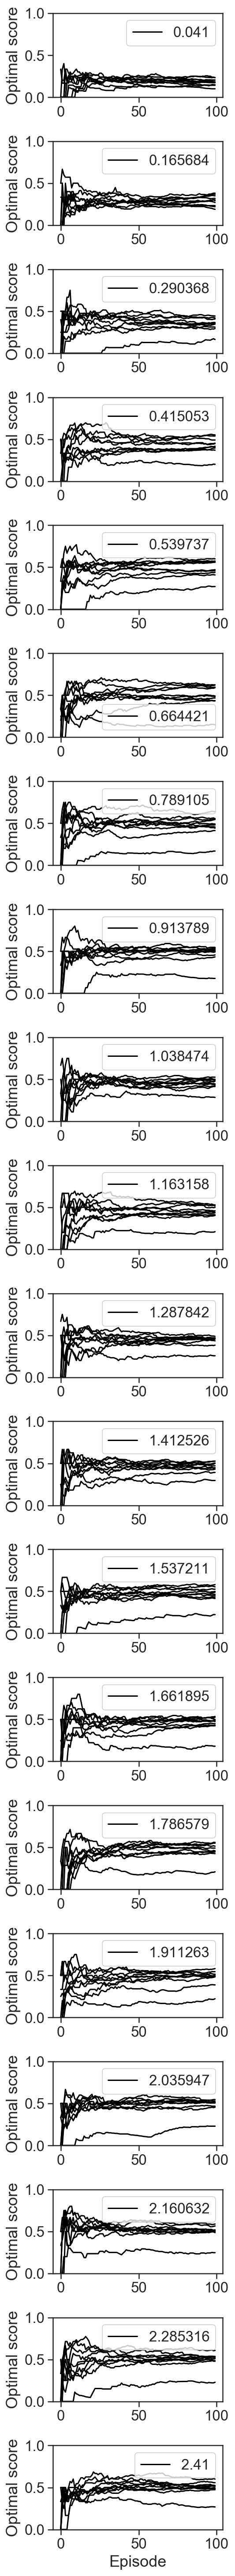

In [11]:
plt.figure(figsize=(4, 40.5))

cs = sorted(set(grid_41['c']))
for n, c in enumerate(cs):
    plt.subplot(len(cs), 1, n+1)
    index = c == np.asarray(grid_41['c'])
    index = np.arange(0,len(index))[index]
    first = True
    for r, mon in enumerate(exp_41):
        if r in index:
            if mon is not None:
                _ = plt.plot(mon['episode'], mon['score'], label=c, color='black')
                _ = plt.ylim(0, 1)
                _ = plt.ylabel("Optimal score")
                _ = plt.tight_layout()
                if first:
                    plt.legend()
                    first = False
                                    
_ = plt.xlabel("Episode")

Histograms of final values

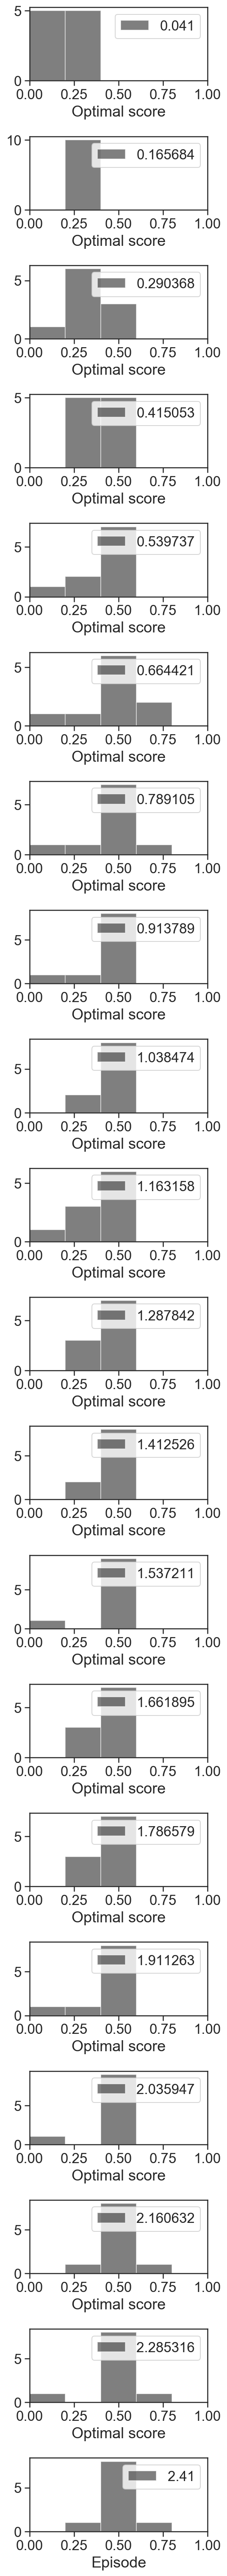

In [26]:
plt.figure(figsize=(4, 42.5))

sims = sorted(set(grid_41['c']))
for n, sim in enumerate(sims):
    plt.subplot(len(sims), 1, n+1)
    index = sim == np.asarray(grid_41['c'])
    index = np.arange(0,len(index))[index]
    first = True
    data = []
    for r, mon in enumerate(exp_41):
        if r in index:
            if mon is not None:
                data.append(np.mean(mon['score']))                
    _ = plt.hist(data, label=sim, alpha=0.5, color="black", bins=5, range=(0,1))        
    _ = plt.xlabel("Optimal score")
    _ = plt.xlim(0,1)
    _ = plt.tight_layout()
    plt.legend()
                                    
_ = plt.xlabel("Episode")

## num_simulations

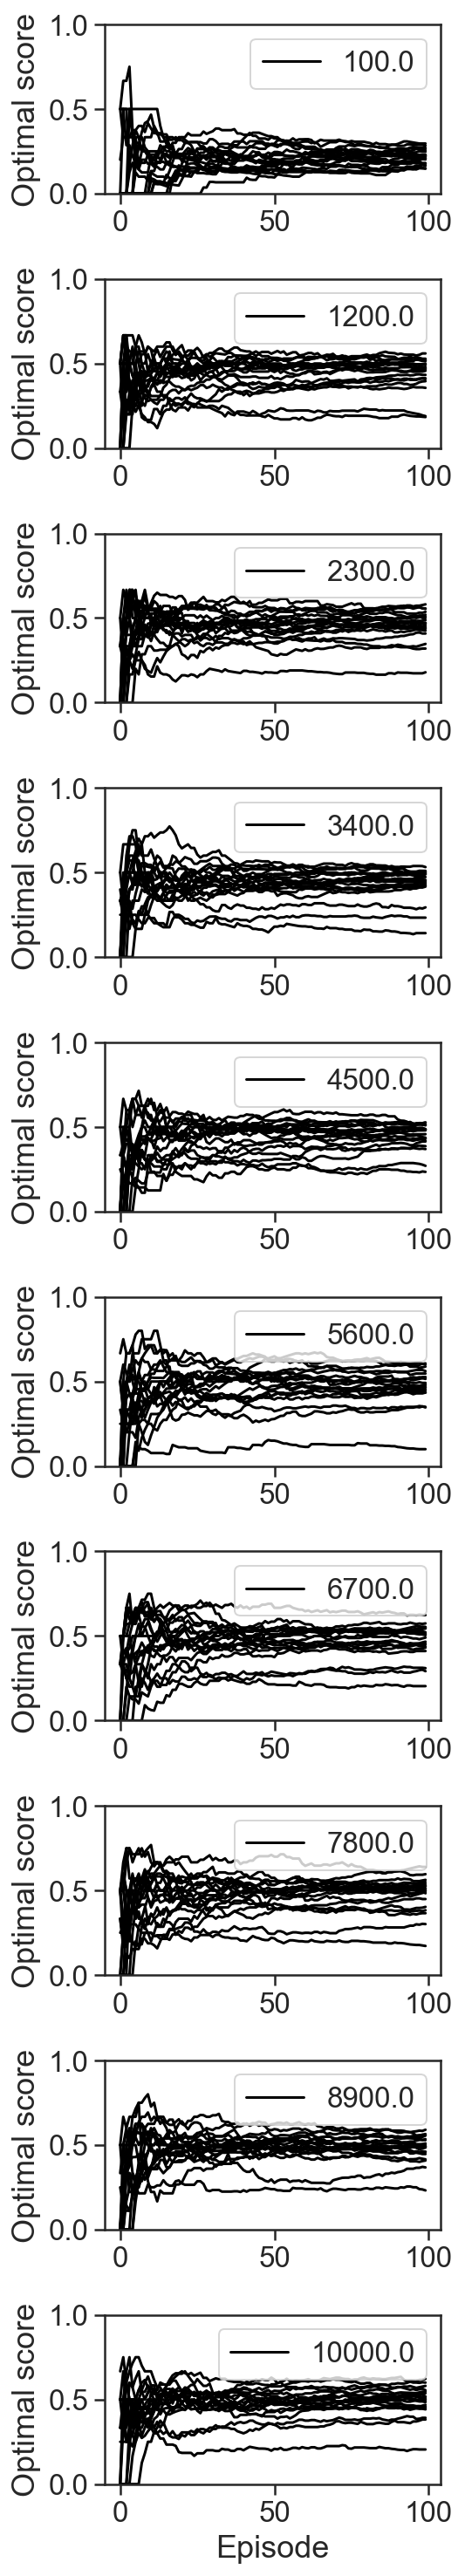

In [18]:
plt.figure(figsize=(4, 20.5))

sims = sorted(set(grid_41['num_simulations']))
for n, sim in enumerate(sims):
    plt.subplot(len(sims), 1, n+1)
    index = sim == np.asarray(grid_41['num_simulations'])
    index = np.arange(0,len(index))[index]
    first = True
    for r, mon in enumerate(exp_41):
        if r in index:
            if mon is not None:
                _ = plt.plot(mon['episode'], mon['score'], label=sim, color='black')
                _ = plt.ylim(0, 1)
                _ = plt.ylabel("Optimal score")
                _ = plt.tight_layout()
                if first:
                    plt.legend()
                    first = False
                                    
_ = plt.xlabel("Episode")

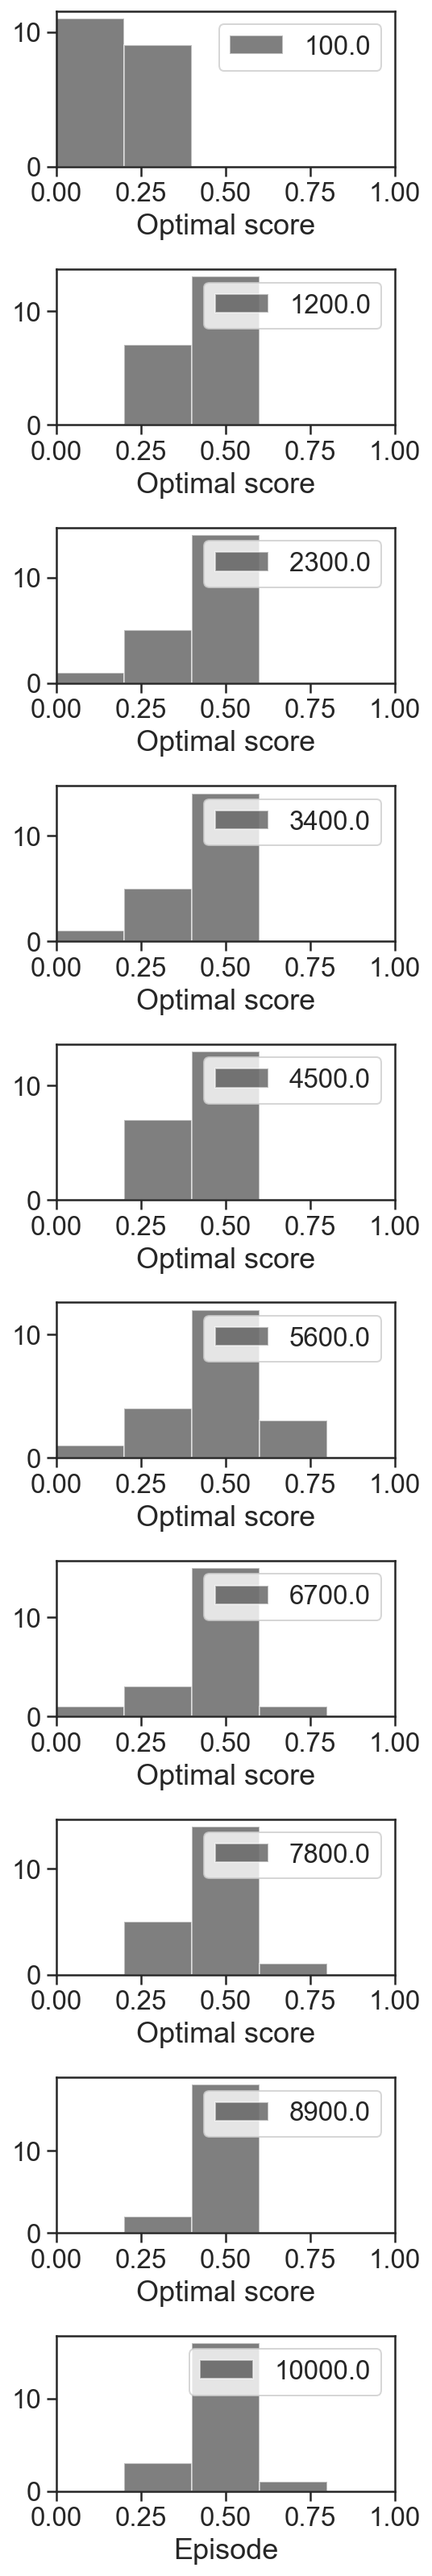

In [25]:
plt.figure(figsize=(4, 22.5))

sims = sorted(set(grid_41['num_simulations']))
for n, sim in enumerate(sims):
    plt.subplot(len(sims), 1, n+1)
    index = sim == np.asarray(grid_41['num_simulations'])
    index = np.arange(0,len(index))[index]
    first = True
    data = []
    for r, mon in enumerate(exp_41):
        if r in index:
            if mon is not None:
                data.append(np.mean(mon['score']))                
    _ = plt.hist(data, label=sim, alpha=0.5, color="black", bins=5, range=(0,1))        
    _ = plt.xlabel("Optimal score")
    _ = plt.xlim(0,1)
    _ = plt.tight_layout()
    plt.legend()
                                    
_ = plt.xlabel("Episode")

# Joint 

Plot ranked max scores DQN for HP sweep: `learning_rate` and `epsilon`.

No handles with labels found to put in legend.


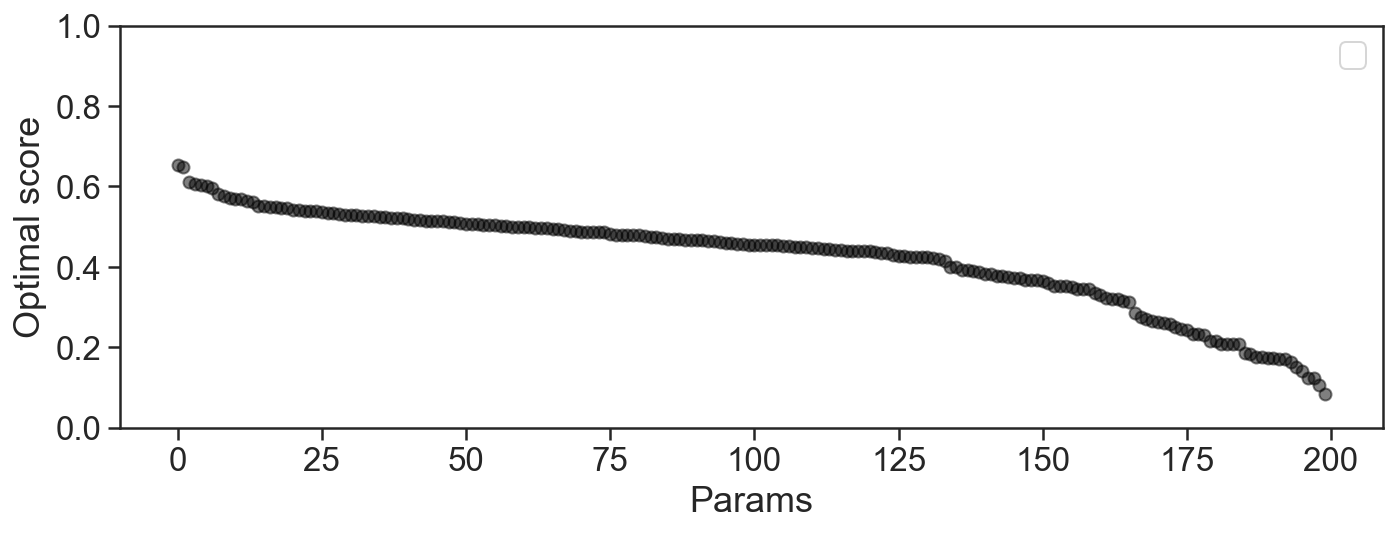

In [23]:
scores = []
for n, exp in enumerate(exp_41):
    if exp is not None:
        x = np.mean(exp['score'])
    else:
        x = 0
    scores.append(x)

scores = np.asarray(scores)
ranks = np.argsort(1 - scores).tolist()

plt.figure(figsize=(10, 4))
_ = plt.scatter(range(len(scores)), scores[ranks], alpha=0.5, color="black")        
_ = plt.ylabel("Optimal score")
_ = plt.xlabel("Params")
_ = plt.ylim(0,1)
_ = plt.tight_layout()
plt.legend()

Top 10:

In [24]:
pprint(("score", "c", "num_simulations"))
pprint([(scores[b], grid_41['c'][b], grid_41['num_simulations'][b]) for b in ranks[:10]])

('score', 'c', 'num_simulations')
[(0.652576431353257, 0.789105, 7800.0),
 (0.6478711065197355, 0.664421, 6700.0),
 (0.6103107447185073, 2.285316, 5600.0),
 (0.6066802872890422, 2.160632, 5600.0),
 (0.6031007463205779, 0.664421, 10000.0),
 (0.6006066764982758, 2.41, 5600.0),
 (0.5973284121730674, 1.163158, 8900.0),
 (0.5807464009991677, 0.539737, 7800.0),
 (0.5768157284371549, 2.160632, 8900.0),
 (0.5715985740509136, 0.415053, 6700.0)]


No handles with labels found to put in legend.


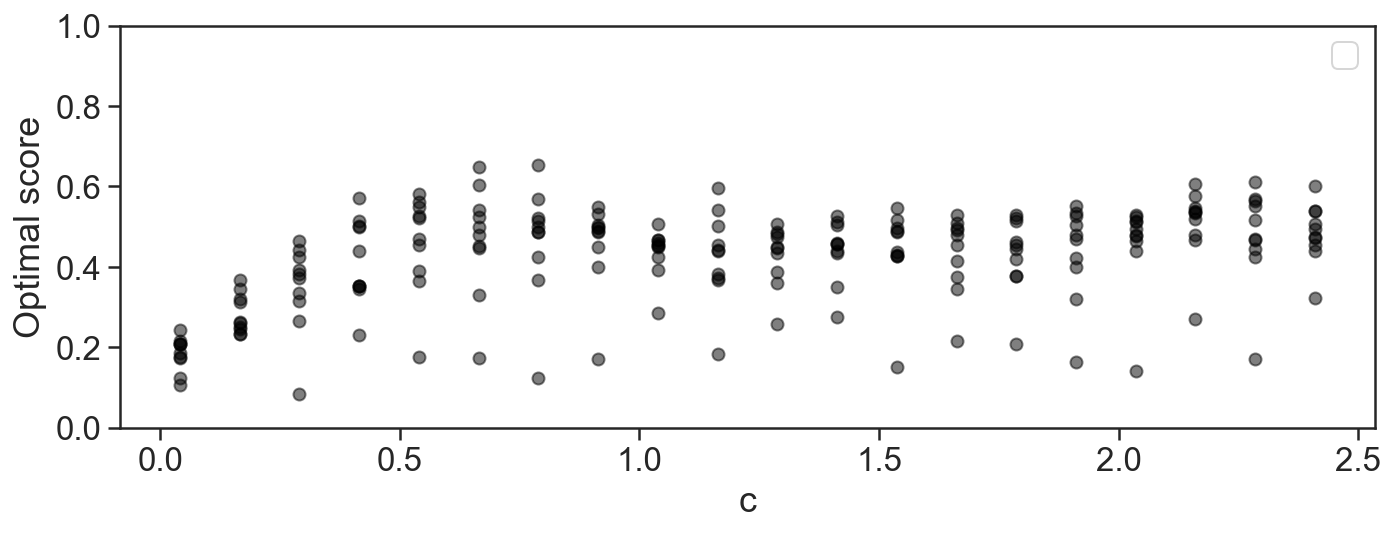

In [28]:
plt.figure(figsize=(10, 4))
_ = plt.scatter(grid_41['c'], scores, alpha=0.5, color="black")        
_ = plt.ylabel("Optimal score")
_ = plt.xlabel("c")
_ = plt.ylim(0,1)
_ = plt.tight_layout()
plt.legend()

No handles with labels found to put in legend.


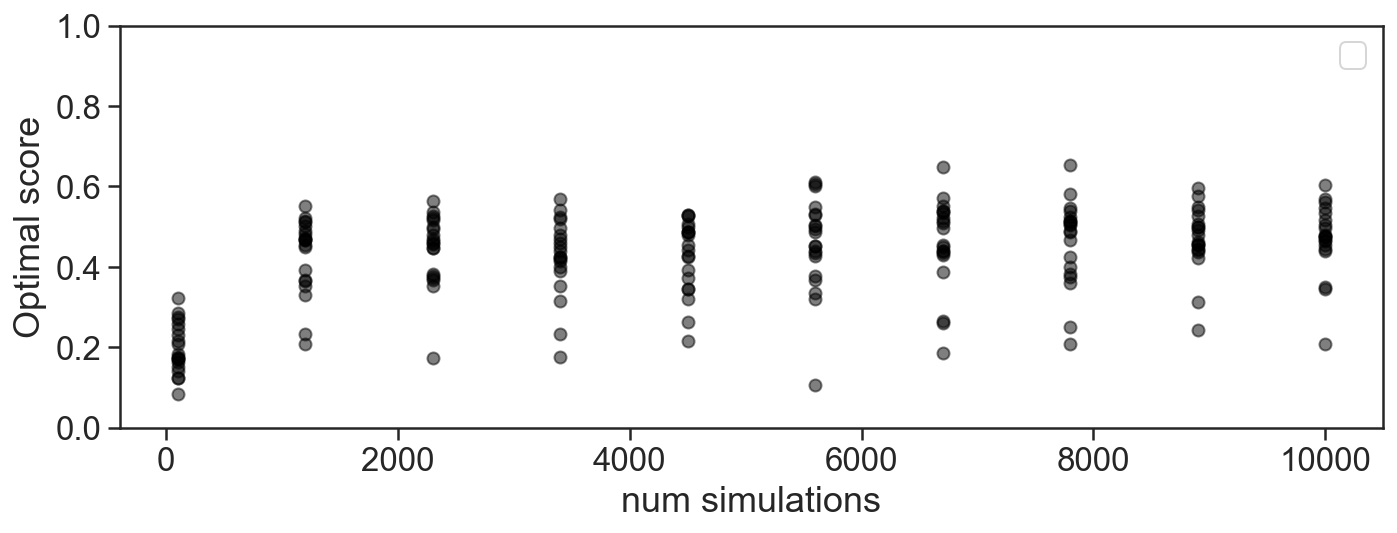

In [29]:
plt.figure(figsize=(10, 4))
_ = plt.scatter(grid_41['num_simulations'], scores, alpha=0.5, color="black")        
_ = plt.ylabel("Optimal score")
_ = plt.xlabel("num simulations")
_ = plt.ylim(0,1)
_ = plt.tight_layout()
plt.legend()